In [73]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [46]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [47]:
x, y = mnist['data'], mnist['target']

In [48]:
some_digit = np.array(x.iloc[0].to_list())
some_digit_image = some_digit.reshape(28,28)

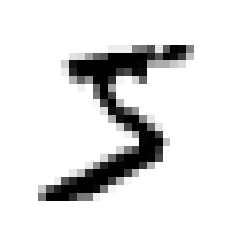

In [49]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [50]:
y[0]

'5'

In [51]:
y = y.astype(np.uint8)

In [52]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

Treinando um classificador binário

In [53]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [54]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [55]:
sgd_clf.predict([some_digit])

/home/motoko/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

Calculando a acurácia com a validação cruzada

In [56]:
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [57]:
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

In [58]:
nver_5_clf = Never5Classifier()

In [59]:
cross_val_score(nver_5_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

matriz de confusão

In [60]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [61]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Precisão e revocação

In [62]:
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [64]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

Trade-off precisão/revocação

In [66]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/home/motoko/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [67]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [68]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [83]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method='decision_function')

In [84]:
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

In [80]:
precision.min()

0.09038605853414491

In [99]:
thresholds.max()

49441.437659047755

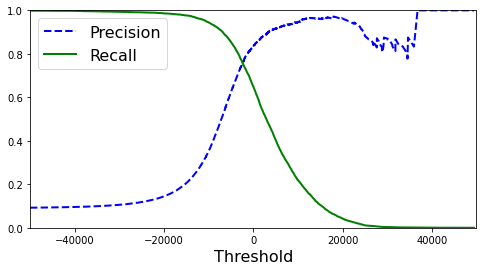

In [88]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.xlim([-50000, 50000])
plt.show()

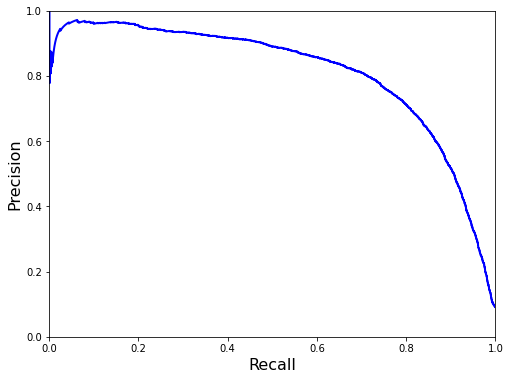

In [106]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precision, recall)
plt.show()

In [108]:
thresholds[np.argmax(precision >= 0.90)]

3370.019499143958